In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install tensorflow --upgrade --force-reinstall

^C


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
import PIL
import cv2

ImportError: cannot import name 'keras' from 'tensorflow' (unknown location)

In [ ]:
image_dir = Path('../input/braille-character-dataset/Braille Dataset/Braille Dataset')

In [ ]:
dir_list = list(image_dir.glob('*.jpg'))

In [ ]:
image_count = len(dir_list)
image_count

1560

In [ ]:
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

In [ ]:
#opens images and puts into a list
images = []
for dir in dir_list:
    I = cv2.imread(str(dir))
    images.append(I)

In [ ]:
#turn both lists in numpy arrays
images_list = np.array(images)
name_list = np.array(name_list).T #transpose - convert columns to rows

In [ ]:
#encodes name_list and normalizes image_list
le = LabelEncoder()
name_list = le.fit_transform(name_list)

#covert image to 0 to 255 (pixel information)
images_list = images_list / 255.0 
print(images_list[0])

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.97647059 0.97647059 0.97647059]
  [0.98431373 0.98431373 0.98431373]
  [0.99607843 0.99607843 0.99607843]]

 [[0.98431373 0.98431373 0.98431373]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]
  ...
  [0.98039216 0.98039216 0.98039216]
  [0.98823529 0.98823529 0.98823529]
  [0.99607843 0.99607843 0.99607843]]

 [[0.97254902 0.97254902 0.97254902]
  [0.98039216 0.98039216 0.98039216]
  [0.98823529 0.98823529 0.98823529]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.99215686 0.99215686 0.99215686]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.98431373 0.98431373 0.98431373]
  [0.98039216 0.98039216 0.98039216]
  [0.97647059 0.97647059 0.97647059]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


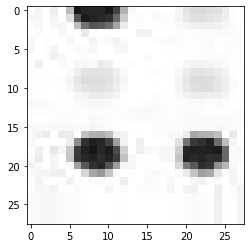

In [ ]:
plt.imshow(images_list[1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

# Creating model: Trial 1: Adam Optimizer

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),

    keras.layers.Dense(units=26, activation="softmax") #output layer
])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

SAME Padding: it applies padding to the input image so that the input image gets fully covered by the filter and specified stride.It is called SAME because, for stride 1 , the output will be the same as the input.

In [ ]:
model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

if you use categorical-cross-entropy you need one-hot encoding, and if you use sparse-categorical-cross-entropy you encode as normal integers.

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 3s 56ms/step - loss: 3.2901 - sparse_categorical_accuracy: 0.1088 - val_loss: 3.3275 - val_sparse_categorical_accuracy: 0.0347
Epoch 2/100
28/28 [==============================] - 1s 42ms/step - loss: 2.0173 - sparse_categorical_accuracy: 0.4066 - val_loss: 4.5963 - val_sparse_categorical_accuracy: 0.0347
Epoch 3/100
28/28 [==============================] - 1s 43ms/step - loss: 1.4359 - sparse_categorical_accuracy: 0.5659 - val_loss: 5.3661 - val_sparse_categorical_accuracy: 0.0347
Epoch 4/100
28/28 [==============================] - 1s 42ms/step - loss: 1.0661 - sparse_categorical_accuracy: 0.6930 - val_loss: 7.5800 - val_sparse_categorical_accuracy: 0.0347
Epoch 5/100
28/28 [==============================] - 1s 42ms/step - loss: 0.8935 - sparse_categorical_accuracy: 0.7320 - val_loss: 8.5713 - val_sparse_categorical_accuracy: 0.0347
Epoch 6/100
28/28 [==============================] - 1s 42ms/step - loss: 0.7738 - sparse_categorica

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          2

In [ ]:
time = np.arange(1, len(history.history['loss'])+1)

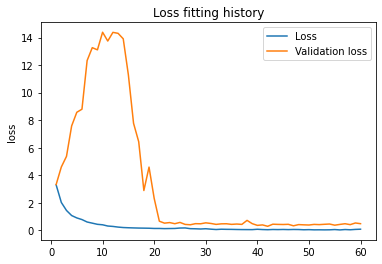

In [ ]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

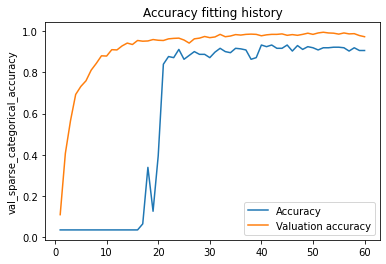

In [ ]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [ ]:
print("Adam Optimizer")
model.evaluate(X_test, y_test)

Adam Optimizer
10/10 [==============================] - 1s 72ms/step - loss: 0.2724 - sparse_categorical_accuracy: 0.9295


[0.27241936326026917, 0.9294871687889099]

# Optimization Model 1

In [ ]:
!pip install --upgrade tensorflow-model-optimization

     |████████████████████████████████| 242 kB 6.8 MB/s            
     |████████████████████████████████| 126 kB 42.6 MB/s            
     |████████████████████████████████| 241 kB 50.3 MB/s            
     |████████████████████████████████| 240 kB 53.1 MB/s            
     |████████████████████████████████| 238 kB 52.3 MB/s            


In [ ]:
import tensorflow_model_optimization as tfmot  # TensorFlow Model Optimization toolkit

In [ ]:
# model_save_path = 'cnn_model.h5'
model_save_path = 'cnn_model1_braille.keras'
model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size: {model_size / 1024:.2f} KB")

Model size: 6973.26 KB


In [ ]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.1, begin_step=0, frequency=100)
  }

pruned_model = prune_low_magnitude(model, **pruning_params)
pruned_model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])
pruned_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv2d ( (None, 28, 28, 64)        9666      
_________________________________________________________________
prune_low_magnitude_max_pool (None, 14, 14, 64)        1         
_________________________________________________________________
prune_low_magnitude_batch_no (None, 14, 14, 64)        257       
_________________________________________________________________
prune_low_magnitude_conv2d_1 (None, 14, 14, 64)        73794     
_________________________________________________________________
prune_low_magnitude_max_pool (None, 7, 7, 64)          1         
_________________________________________________________________
prune_low_magnitude_dropout  (None, 7, 7, 64)          1         
_________________________________________________________________
prune_low_magnitude_batch_no (None, 7, 7, 64)          2

# Pruning

In [ ]:
import time
start_pruning_time = time.time()

# Train the model
history = pruned_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()])

end_time = time.time()
total_time = end_time - start_pruning_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
28/28 [==============================] - 7s 60ms/step - loss: 0.0732 - sparse_categorical_accuracy: 0.9782 - val_loss: 0.6577 - val_sparse_categorical_accuracy: 0.8827
Epoch 2/100
28/28 [==============================] - 1s 45ms/step - loss: 0.0805 - sparse_categorical_accuracy: 0.9794 - val_loss: 0.6818 - val_sparse_categorical_accuracy: 0.8560
Epoch 3/100
28/28 [==============================] - 3s 88ms/step - loss: 0.0728 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.3575 - val_sparse_categorical_accuracy: 0.9227
Epoch 4/100
28/28 [==============================] - 1s 46ms/step - loss: 0.0892 - sparse_categorical_accuracy: 0.9691 - val_loss: 0.4433 - val_sparse_categorical_accuracy: 0.9067
Epoch 5/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0370 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.3538 - val_sparse_categorical_accuracy: 0.9173
Epoch 6/100
28/28 [==============================] - 1s 46ms/step - loss: 0.0579 - sparse_categorica

# Evaluate the model with testing data

In [ ]:
# Evaluate the model on the test data
pruned_test_loss, pruned_test_acc = pruned_model.evaluate(X_test, y_test)

print(f"Test accuracy: {pruned_test_acc}")

10/10 [==============================] - 0s 13ms/step - loss: 0.2362 - sparse_categorical_accuracy: 0.9455
Test accuracy: 0.9455128312110901


In [ ]:
model_save_path = 'cnn_pruned_model1_braille.keras'
pruned_model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning: {model_size / 1024:.2f} KB")

Model size after pruning: 9294.54 KB


In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model = converter.convert()

# Save the TFLite model to a file
model_save_path = 'pruned_model1_braille.tflite'
with open(model_save_path, 'wb') as f:
    f.write(tflite_model)

model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning + convert to tf lite: {model_size / 1024:.2f} KB")

Model size after pruning + convert to tf lite: 2291.84 KB


# Post Training Quantization

In [ ]:
# Strip the pruning wrappers to finalize the pruned model
final_model = tfmot.sparsity.keras.strip_pruning(pruned_model)
final_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 7, 64)          2

In [ ]:
# Convert to TensorFlow Lite model with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)

# Set quantization parameters
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Default optimization includes quantization

# Optionally, if you have representative data, you can enable full integer quantization:
# Provide a representative dataset for better accuracy in quantization
def representative_dataset():
    for data in X_test.take(100):  # use a small sample of your data <<< what if we change this to 1000? to all data? 70rb? how?
        yield [tf.dtypes.cast(data, tf.float32)] # can we change this to integer?

converter.representative_dataset = representative_dataset
converter.target_spec.supported_types = [tf.float16]  # This can be int8 as well, hm... << nope, error

# Convert the model
quantized_tflite_model = converter.convert()

# Save the quantized model to a file
with open('quantized_pruned_model1_braille.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

# To load and use the TFLite model later:
interpreter = tf.lite.Interpreter(model_path='quantized_pruned_model1_braille.tflite')
interpreter.allocate_tensors()

In [ ]:
final_model.compile(optimizer="Adam", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [ ]:
start_quantization_time = time.time()

history = final_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()])

end_time = time.time()
total_time = end_time - start_quantization_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
28/28 [==============================] - 3s 52ms/step - loss: 0.0341 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.4248 - val_sparse_categorical_accuracy: 0.9067
Epoch 2/100
28/28 [==============================] - 1s 42ms/step - loss: 0.0337 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.5837 - val_sparse_categorical_accuracy: 0.9120
Epoch 3/100
28/28 [==============================] - 3s 91ms/step - loss: 0.0419 - sparse_categorical_accuracy: 0.9851 - val_loss: 0.5047 - val_sparse_categorical_accuracy: 0.9040
Epoch 4/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0354 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.4977 - val_sparse_categorical_accuracy: 0.9120
Epoch 5/100
28/28 [==============================] - 1s 42ms/step - loss: 0.0519 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.4388 - val_sparse_categorical_accuracy: 0.9307
Epoch 6/100
28/28 [==============================] - 1s 41ms/step - loss: 0.0901 - sparse_categorica

In [ ]:
model_size = os.path.getsize('quantized_pruned_model1_braille.tflite')
print(f"Model size after quantization: {model_size / 1024:.2f} KB")

Model size after quantization: 1151.78 KB


In [ ]:
# Evaluate the model on the test data
final_test_loss, final_test_acc = final_model.evaluate(X_test, y_test)

print(f"Test accuracy: {final_test_acc}")

10/10 [==============================] - 0s 12ms/step - loss: 0.2969 - sparse_categorical_accuracy: 0.9295
Test accuracy: 0.9294871687889099


# Creating model: Trial 2: RMS Prop

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.25),   
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    
    keras.layers.Dense(units=576, activation="relu"),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(units=288, activation="relu"),
    keras.layers.Dense(units=26, activation="softmax") #output layer
])

In [ ]:
model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es1 = EarlyStopping(patience=20, monitor="val_sparse_categorical_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

#The neural network will stop fitting if it gets 20 epochs without converge

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 3s 54ms/step - loss: 2.8577 - sparse_categorical_accuracy: 0.2211 - val_loss: 3.3785 - val_sparse_categorical_accuracy: 0.0427
Epoch 2/100
28/28 [==============================] - 1s 43ms/step - loss: 1.7236 - sparse_categorical_accuracy: 0.5017 - val_loss: 4.2260 - val_sparse_categorical_accuracy: 0.0347
Epoch 3/100
28/28 [==============================] - 1s 44ms/step - loss: 1.2328 - sparse_categorical_accuracy: 0.6460 - val_loss: 5.6042 - val_sparse_categorical_accuracy: 0.0347
Epoch 4/100
28/28 [==============================] - 1s 43ms/step - loss: 0.9630 - sparse_categorical_accuracy: 0.7068 - val_loss: 8.3451 - val_sparse_categorical_accuracy: 0.0347
Epoch 5/100
28/28 [==============================] - 1s 43ms/step - loss: 0.7613 - sparse_categorical_accuracy: 0.7675 - val_loss: 8.2148 - val_sparse_categorical_accuracy: 0.0347
Epoch 6/100
28/28 [==============================] - 1s 42ms/step - loss: 0.6265 - sparse_categorica

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 64)         

In [ ]:
time = np.arange(1, len(history.history['loss'])+1)

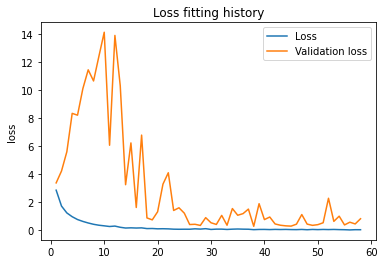

In [ ]:
sns.lineplot(data=history.history, x=time, y='loss')
sns.lineplot(data=history.history, x=time, y='val_loss')
plt.title('Loss fitting history')
plt.legend(labels=['Loss', 'Validation loss'])
plt.show()

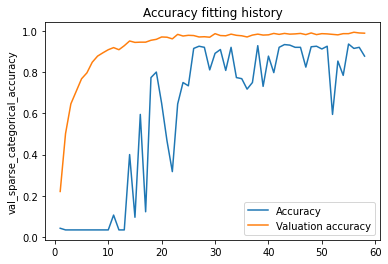

In [ ]:
sns.lineplot(data=history.history, x=time, y='val_sparse_categorical_accuracy')
sns.lineplot(data=history.history, x=time, y='sparse_categorical_accuracy')
plt.title('Accuracy fitting history')
plt.legend(labels=['Accuracy', 'Valuation accuracy'])
plt.show()

In [ ]:
print("RMSProp")
model.evaluate(X_test, y_test)

RMSProp
10/10 [==============================] - 0s 11ms/step - loss: 0.6370 - sparse_categorical_accuracy: 0.8846


[0.6369917988777161, 0.8846153616905212]

# Optimization Model 2

In [ ]:
# model_save_path = 'cnn_model.h5'
model_save_path = 'cnn_model2_braille.keras'
model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size: {model_size / 1024:.2f} KB")

Model size: 4678.53 KB


In [ ]:
prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.1, begin_step=0, frequency=100)
  }

pruned_model = prune_low_magnitude(model, **pruning_params)
pruned_model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])
pruned_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
prune_low_magnitude_conv2d_3 (None, 28, 28, 64)        9666      
_________________________________________________________________
prune_low_magnitude_max_pool (None, 14, 14, 64)        1         
_________________________________________________________________
prune_low_magnitude_batch_no (None, 14, 14, 64)        257       
_________________________________________________________________
prune_low_magnitude_conv2d_4 (None, 14, 14, 64)        73794     
_________________________________________________________________
prune_low_magnitude_max_pool (None, 7, 7, 64)          1         
_________________________________________________________________
prune_low_magnitude_dropout_ (None, 7, 7, 64)          1         
_________________________________________________________________
prune_low_magnitude_batch_no (None, 7, 7, 64)         

# Pruning

In [ ]:
import time
start_pruning_time = time.time()

# Train the model
history = pruned_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()])

end_time = time.time()
total_time = end_time - start_pruning_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
28/28 [==============================] - 7s 60ms/step - loss: 0.0384 - sparse_categorical_accuracy: 0.9885 - val_loss: 0.6044 - val_sparse_categorical_accuracy: 0.9013
Epoch 2/100
28/28 [==============================] - 3s 95ms/step - loss: 0.0543 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.4822 - val_sparse_categorical_accuracy: 0.9307
Epoch 3/100
28/28 [==============================] - 1s 48ms/step - loss: 0.0435 - sparse_categorical_accuracy: 0.9885 - val_loss: 1.0129 - val_sparse_categorical_accuracy: 0.8773
Epoch 4/100
28/28 [==============================] - 1s 48ms/step - loss: 0.0537 - sparse_categorical_accuracy: 0.9874 - val_loss: 0.5057 - val_sparse_categorical_accuracy: 0.9387
Epoch 5/100
28/28 [==============================] - 1s 44ms/step - loss: 0.0396 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.7415 - val_sparse_categorical_accuracy: 0.8960
Epoch 6/100
28/28 [==============================] - 1s 44ms/step - loss: 0.0152 - sparse_categorica

# Evaluate the model with testing data¶

In [ ]:
# Evaluate the model on the test data
pruned_test_loss, pruned_test_acc = pruned_model.evaluate(X_test, y_test)
print(f"Test accuracy: {pruned_test_acc}")

10/10 [==============================] - 0s 13ms/step - loss: 0.2669 - sparse_categorical_accuracy: 0.9487
Test accuracy: 0.9487179517745972


In [ ]:
model_save_path = 'cnn_pruned_model2_braille.keras'
pruned_model.save(model_save_path)

# Get the size of the model in bytes
model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning: {model_size / 1024:.2f} KB")

Model size after pruning: 6997.76 KB


In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)
converter = tf.lite.TFLiteConverter.from_keras_model(model_for_export)
tflite_model = converter.convert()

# Save the TFLite model to a file
model_save_path = 'pruned_model2_braille.tflite'
with open(model_save_path, 'wb') as f:
    f.write(tflite_model)

model_size = os.path.getsize(model_save_path)
print(f"Model size after pruning + convert to tf lite: {model_size / 1024:.2f} KB")

Model size after pruning + convert to tf lite: 2292.02 KB


# Post Training Quantization

In [ ]:
# Strip the pruning wrappers to finalize the pruned model
final_model = tfmot.sparsity.keras.strip_pruning(pruned_model)
final_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 64)         

In [ ]:
# Convert to TensorFlow Lite model with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(final_model)

# Set quantization parameters
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Default optimization includes quantization

# Optionally, if you have representative data, you can enable full integer quantization:
# Provide a representative dataset for better accuracy in quantization
def representative_dataset():
    for data in X_test.take(100):  # use a small sample of your data <<< what if we change this to 1000? to all data? 70rb? how?
        yield [tf.dtypes.cast(data, tf.float32)] # can we change this to integer?

converter.representative_dataset = representative_dataset
converter.target_spec.supported_types = [tf.float16]  # This can be int8 as well, hm... << nope, error

# Convert the model
quantized_tflite_model = converter.convert()

# Save the quantized model to a file
with open('quantized_pruned_model2_braille.tflite', 'wb') as f:
    f.write(quantized_tflite_model)

# To load and use the TFLite model later:
interpreter = tf.lite.Interpreter(model_path='quantized_pruned_model2_braille.tflite')
interpreter.allocate_tensors()

In [ ]:
final_model.compile(optimizer="RMSprop", loss="SparseCategoricalCrossentropy", metrics=["sparse_categorical_accuracy"])

In [ ]:
start_quantization_time = time.time()

history = final_model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    validation_split=0.3,
                    callbacks=[es1, es2, tfmot.sparsity.keras.UpdatePruningStep()])

end_time = time.time()
total_time = end_time - start_quantization_time 
print(f"Total time: {total_time:.2f} seconds")

Epoch 1/100
28/28 [==============================] - 3s 54ms/step - loss: 0.0262 - sparse_categorical_accuracy: 0.9931 - val_loss: 0.6203 - val_sparse_categorical_accuracy: 0.8853
Epoch 2/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0410 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.6815 - val_sparse_categorical_accuracy: 0.9120
Epoch 3/100
28/28 [==============================] - 1s 45ms/step - loss: 0.0302 - sparse_categorical_accuracy: 0.9920 - val_loss: 0.4408 - val_sparse_categorical_accuracy: 0.9307
Epoch 4/100
28/28 [==============================] - 1s 44ms/step - loss: 0.0041 - sparse_categorical_accuracy: 0.9989 - val_loss: 0.4412 - val_sparse_categorical_accuracy: 0.9413
Epoch 5/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0462 - sparse_categorical_accuracy: 0.9897 - val_loss: 0.7025 - val_sparse_categorical_accuracy: 0.8987
Epoch 6/100
28/28 [==============================] - 1s 43ms/step - loss: 0.0199 - sparse_categorica

In [ ]:
model_size = os.path.getsize('quantized_pruned_model2_braille.tflite')
print(f"Model size after quantization: {model_size / 1024:.2f} KB")

Model size after quantization: 1152.00 KB


In [ ]:
# Evaluate the model on the test data
final_test_loss, final_test_acc = final_model.evaluate(X_test, y_test)

print(f"Test accuracy: {final_test_acc}")

10/10 [==============================] - 0s 24ms/step - loss: 0.3833 - sparse_categorical_accuracy: 0.9359
Test accuracy: 0.9358974099159241
